<a href="https://colab.research.google.com/github/naderghanbari/mcgill-capstone/blob/master/capstone_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams["figure.dpi"] = 150

### Load dataset
In this step we load the data from 2015 to the end of 2019.

In [ ]:
# Download the preprocessed dataset
%%bash
mkdir -p data
curl https://storage.googleapis.com/capstone-data-lake/aggregated/indicents_crimes_date_division.csv --silent --output data/indicents_crimes_date_division.csv
echo Number of lines: `wc -l data/*`

Number of lines: 12265 data/indicents_crimes_date_division.csv


In [13]:
df = pd.read_csv("data/indicents_crimes_date_division.csv", parse_dates=["date"])

# Keep only dates in the [2015, 2019] range
df = df[df["date"].between("2015-01-01", "2019-12-31")]

# Convert type to Pandas date type
df["date"] = df["date"].dt.date
df.head()

,date,division,incidents,units_deployed,crimes
0,2015-01-01,1,34,59,3
1,2015-01-01,2,81,140,15
2,2015-01-01,3,70,118,5
3,2015-01-01,4,70,92,8
4,2015-01-01,5,84,137,15


In [21]:
# Split the data for each division
division_dfs = [pd.DataFrame(y) for x, y in df.groupby("division", as_index=False)]
division_dfs

[             date  division  incidents  units_deployed  crimes
 0      2015-01-01         1         34              59       3
 6      2015-01-02         1         33              42       6
 12     2015-01-03         1         38              69       5
 18     2015-01-04         1        128             176       4
 24     2015-01-05         1         52              97       9
 ...           ...       ...        ...             ...     ...
 10926  2019-12-27         1         36              61       5
 10932  2019-12-28         1         22              33       1
 10938  2019-12-29         1         31              58       2
 10944  2019-12-30         1         28              45       6
 10950  2019-12-31         1         31              39       2
 
 [1826 rows x 5 columns],
              date  division  incidents  units_deployed  crimes
 1      2015-01-01         2         81             140      15
 7      2015-01-02         2         59              86       9
 13     2015

In [30]:
# Division 1 data
division_dfs[0].head()

# TODO: Add column for incidents_yesterday and crimes_yesterday
# division_dfs[0]["incidents_week"] = shift by 1

,date,division,incidents,units_deployed,crimes
0,2015-01-01,1,34,59,3
6,2015-01-02,1,33,42,6
12,2015-01-03,1,38,69,5
18,2015-01-04,1,128,176,4
24,2015-01-05,1,52,97,9


Text(0.5, 1.0, 'Station 1 Incidents')

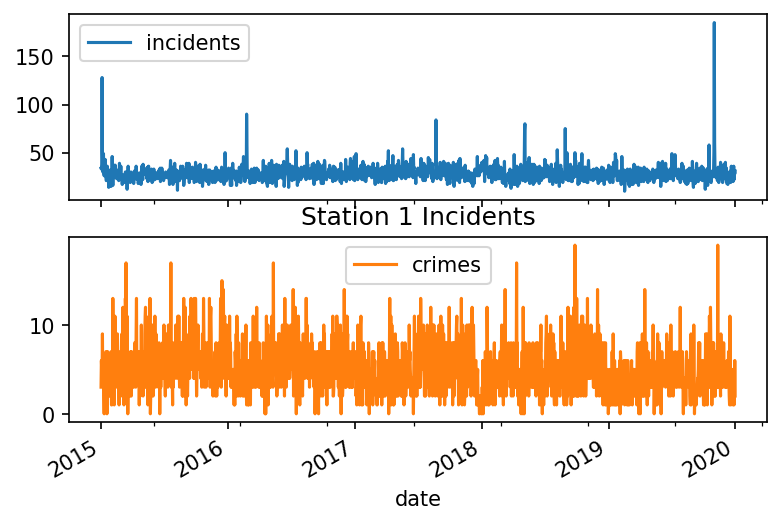

In [24]:
# Station 1
plot_cols = ["incidents", "crimes"]
plot_features = division_dfs[0][plot_cols]
plot_features.index = division_dfs[0]["date"]
plot_features.plot(subplots=True);
plt.title("Station 1 Incidents");

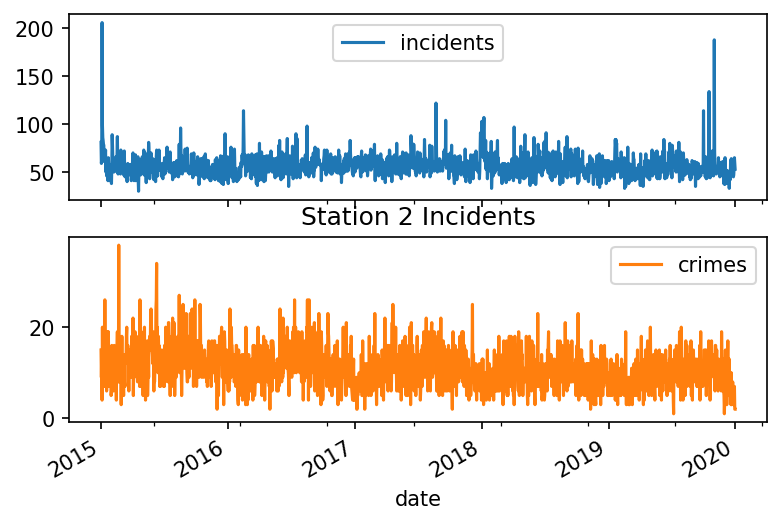

In [28]:
# Station 2
plot_cols = ["incidents", "crimes"]
plot_features = division_dfs[1][plot_cols]
plot_features.index = division_dfs[1]["date"]
plot_features.plot(subplots=True);
plt.title("Station 2 Incidents");

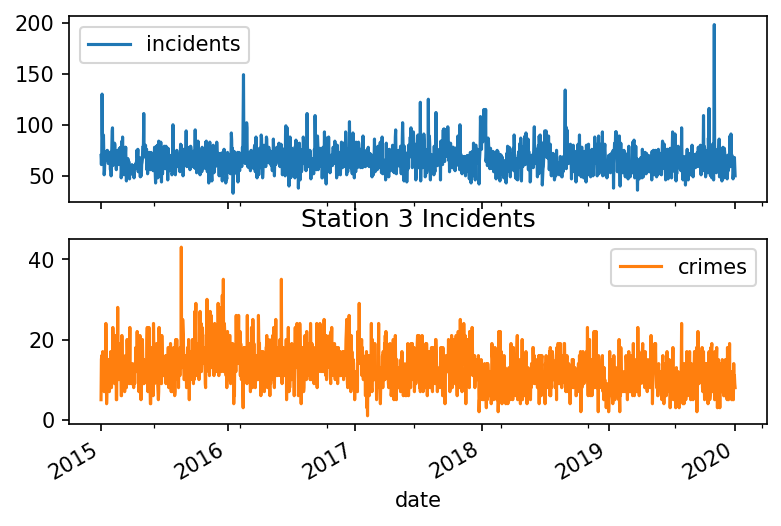

In [29]:
# Station 3
plot_cols = ["incidents", "crimes"]
plot_features = division_dfs[2][plot_cols]
plot_features.index = division_dfs[2]["date"]
plot_features.plot(subplots=True);
plt.title("Station 3 Incidents");

# Test Training Split

- Random
- Squential (First 80% training, Last 20% test)